### Project & Environment Check

This cell verifies the current working directory of the notebook.  
It ensures that relative paths used to access the dataset will work correctly.  
Running this first helps prevent path-related errors in later stages of the project.

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt

print("Current working directory:")
print(os.getcwd())


Current working directory:
d:\WorkSpace\Python Works\TSR_CNN_Project\notebooks


### Dataset Path Validation

This cell defines the directory paths for the training and testing datasets.  
It checks whether the required folders exist before proceeding further.  
This step acts as an early validation to avoid runtime errors during training.

In [16]:
DATA_DIR = "../data"
TRAIN_DIR = os.path.join(DATA_DIR, "Train")
TEST_DIR = os.path.join(DATA_DIR, "Test")

print("Train path exists:", os.path.exists(TRAIN_DIR))
print("Test path exists:", os.path.exists(TEST_DIR))


Train path exists: True
Test path exists: True


### Class Folder Inspection

This cell lists all class folders present in the training dataset.  
Each folder corresponds to a unique traffic sign class.  
It also helps confirm the total number of classes the model will learn.

In [17]:
classes = sorted(os.listdir(TRAIN_DIR))
print("Number of classes:", len(classes))
print("Classes:", classes)


Number of classes: 85
Classes: ['ALL_MOTOR_VEHICLE_PROHIBITED', 'AXLE_LOAD_LIMIT', 'BARRIER_AHEAD', 'BULLOCK_AND_HANDCART_PROHIBITED', 'BULLOCK_PROHIBITED', 'CATTLE', 'COMPULSARY_AHEAD', 'COMPULSARY_AHEAD_OR_TURN_LEFT', 'COMPULSARY_AHEAD_OR_TURN_RIGHT', 'COMPULSARY_CYCLE_TRACK', 'COMPULSARY_KEEP_LEFT', 'COMPULSARY_KEEP_RIGHT', 'COMPULSARY_MINIMUM_SPEED', 'COMPULSARY_SOUND_HORN', 'COMPULSARY_TURN_LEFT', 'COMPULSARY_TURN_LEFT_AHEAD', 'COMPULSARY_TURN_RIGHT', 'COMPULSARY_TURN_RIGHT_AHEAD', 'CROSS_ROAD', 'CYCLE_CROSSING', 'CYCLE_PROHIBITED', 'DANGEROUS_DIP', 'DIRECTION', 'FALLING_ROCKS', 'FERRY', 'GAP_IN_MEDIAN', 'GIVE_WAY', 'GUARDED_LEVEL_CROSSING', 'HANDCART_PROHIBITED', 'HEIGHT_LIMIT', 'HORN_PROHIBITED', 'HUMP_OR_ROUGH_ROAD', 'LEFT_HAIR_PIN_BEND', 'LEFT_HAND_CURVE', 'LEFT_REVERSE_BEND', 'LEFT_TURN_PROHIBITED', 'LENGTH_LIMIT', 'LOAD_LIMIT', 'LOOSE_GRAVEL', 'MEN_AT_WORK', 'NARROW_BRIDGE', 'NARROW_ROAD_AHEAD', 'NO_ENTRY', 'NO_PARKING', 'NO_STOPPING_OR_STANDING', 'OVERTAKING_PROHIBITED', 'P

### Image Count per Class

This cell calculates the number of images available for each class.  
It helps identify class imbalance or missing data.  
Understanding data distribution is important for building a reliable model.

In [18]:
class_counts = {}

for cls in classes:
    cls_path = os.path.join(TRAIN_DIR, cls)
    class_counts[cls] = len(os.listdir(cls_path))

class_counts


{'ALL_MOTOR_VEHICLE_PROHIBITED': 16,
 'AXLE_LOAD_LIMIT': 18,
 'BARRIER_AHEAD': 7,
 'BULLOCK_AND_HANDCART_PROHIBITED': 8,
 'BULLOCK_PROHIBITED': 10,
 'CATTLE': 36,
 'COMPULSARY_AHEAD': 42,
 'COMPULSARY_AHEAD_OR_TURN_LEFT': 12,
 'COMPULSARY_AHEAD_OR_TURN_RIGHT': 35,
 'COMPULSARY_CYCLE_TRACK': 15,
 'COMPULSARY_KEEP_LEFT': 58,
 'COMPULSARY_KEEP_RIGHT': 223,
 'COMPULSARY_MINIMUM_SPEED': 23,
 'COMPULSARY_SOUND_HORN': 47,
 'COMPULSARY_TURN_LEFT': 42,
 'COMPULSARY_TURN_LEFT_AHEAD': 18,
 'COMPULSARY_TURN_RIGHT': 6,
 'COMPULSARY_TURN_RIGHT_AHEAD': 29,
 'CROSS_ROAD': 140,
 'CYCLE_CROSSING': 48,
 'CYCLE_PROHIBITED': 44,
 'DANGEROUS_DIP': 13,
 'DIRECTION': 6,
 'FALLING_ROCKS': 29,
 'FERRY': 2,
 'GAP_IN_MEDIAN': 180,
 'GIVE_WAY': 67,
 'GUARDED_LEVEL_CROSSING': 18,
 'HANDCART_PROHIBITED': 27,
 'HEIGHT_LIMIT': 22,
 'HORN_PROHIBITED': 160,
 'HUMP_OR_ROUGH_ROAD': 101,
 'LEFT_HAIR_PIN_BEND': 11,
 'LEFT_HAND_CURVE': 18,
 'LEFT_REVERSE_BEND': 20,
 'LEFT_TURN_PROHIBITED': 126,
 'LENGTH_LIMIT': 15,
 'LOAD_LI

### Class Distribution Visualization

This cell visualizes the number of images per class using a bar chart.  
It provides an intuitive overview of dataset balance.  
This insight can guide decisions such as data augmentation or resampling.

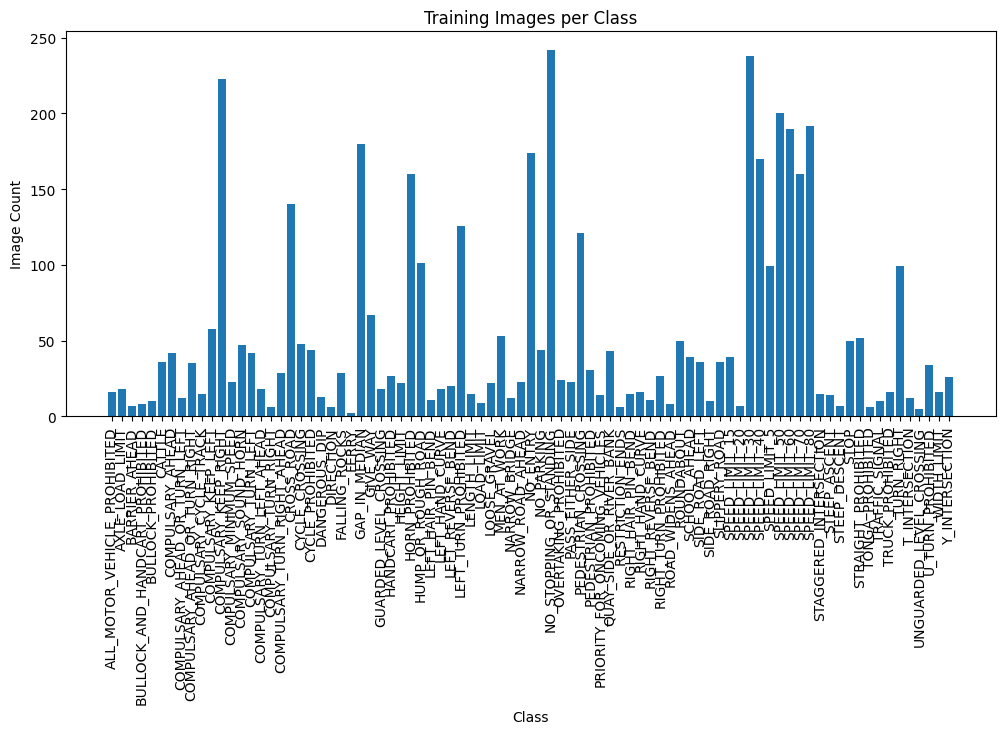

In [19]:
plt.figure(figsize=(12,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title("Training Images per Class")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.show()


### Sample Image Visualization

This cell displays random sample images from different classes.  
It verifies that images are correctly loaded and readable.  
It also gives a visual understanding of traffic sign variations in the dataset.

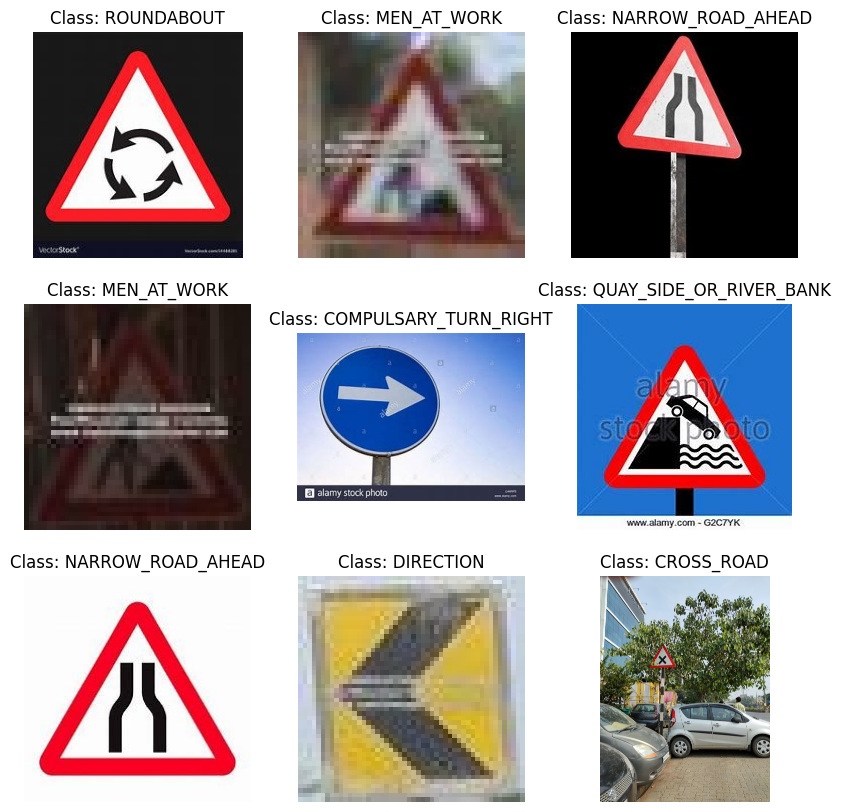

In [20]:
from PIL import Image
import random

plt.figure(figsize=(10,10))

for i in range(9):
    cls = random.choice(classes)
    img_name = random.choice(os.listdir(os.path.join(TRAIN_DIR, cls)))
    img_path = os.path.join(TRAIN_DIR, cls, img_name)
    
    img = Image.open(img_path)
    
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(f"Class: {cls}")
    plt.axis("off")

plt.show()


### Image Property Inspection

This cell inspects basic properties of a sample image, such as size and color mode.  
It ensures compatibility with the CNN input requirements.  
These details are useful when defining preprocessing and model architecture.


In [21]:
sample_img = Image.open(
    os.path.join(TRAIN_DIR, classes[0], os.listdir(os.path.join(TRAIN_DIR, classes[0]))[0])
)

print("Image size:", sample_img.size)
print("Image mode:", sample_img.mode)


Image size: (257, 265)
Image mode: RGB
